In [1]:
from datascience import *
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lecture 08: Sampling #

## Sampling Probability Distributions

In [20]:
die = Table().with_column('Face', np.arange(1, 7))
die

Face
1
2
3
4
5
6


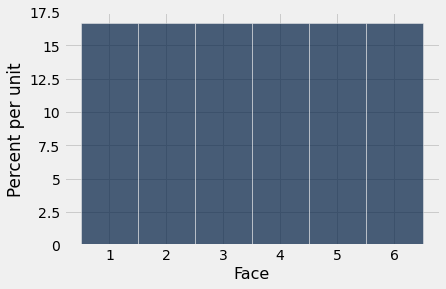

In [11]:

roll_bins = np.arange(0.5, 6.6, 1)
die.hist(bins = roll_bins)

In [12]:
die.sample(10)#rolling the dice 10 times

Face
4
4
6
5
3
3
5
3
4
3


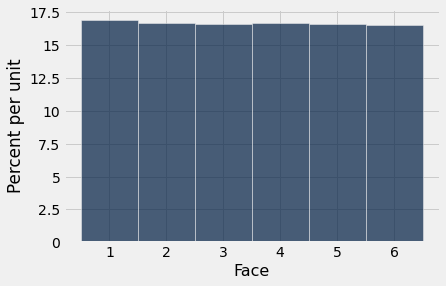

In [29]:
die.sample(100000).hist(bins = roll_bins)

## Sampling Populations##

In [30]:
united = Table.read_table('united_summer2015.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')

In [31]:
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


In [8]:
united.take(make_array(999, 1000, 1001))

Row,Date,Flight Number,Destination,Delay
999,6/7/15,1684,LIH,-3
1000,6/7/15,1692,EWR,7
1001,6/7/15,1699,ATL,6


In [10]:
start = np.random.choice(np.arange(1000))
systematic_sample = united.take(np.arange(start, united.num_rows, 1000))
systematic_sample.show()

Row,Date,Flight Number,Destination,Delay
575,6/4/15,1727,IND,-1
1575,6/11/15,1120,IAH,-2
2575,6/18/15,358,PDX,8
3575,6/24/15,1681,CLE,-4
4575,7/1/15,1156,EWR,1
5575,7/8/15,1178,PDX,133
6575,7/15/15,318,DEN,151
7575,7/21/15,1517,SAN,78
8575,7/28/15,478,LAX,-5
9575,8/3/15,1583,EWR,1


## Large Random Samples ##

In [32]:
united 

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


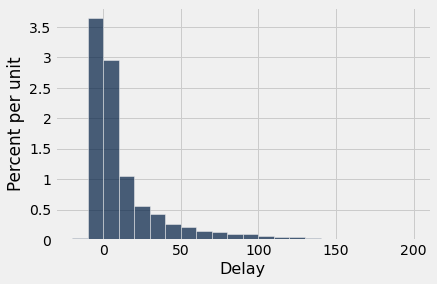

In [33]:
united.hist('Delay', bins = np.arange(-20, 201, 10))

In [34]:
min(united.column('Delay')), max(united.column('Delay'))

(-16, 580)

In [35]:
united.where('Delay', 580)

Row,Date,Flight Number,Destination,Delay
3140,6/21/15,1964,SEA,580


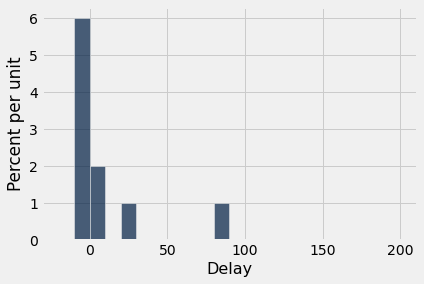

In [39]:
united.sample(10).hist('Delay', bins = np.arange(-20, 201, 10))

In [40]:
np.median(united.column('Delay'))

2.0

In [ ]:
united.where('Delay', are.below_or_equal_to(2)).num_rows / united.num_rows

## Calculation, Enumeration, Estimation ##

In [ ]:
die = Table().with_column('Face', np.arange(1, 7))
die

In [ ]:
p=make_array()
rolls=4
samples = 10000
for i in range(samples):
    p=np.append(p,np.sum(die.sample(rolls).column("Face")==6)>0)
p=np.sum(p)/samples
p


In [ ]:
1-(5/6)**4